In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
dir1 = r"/Users/zhilinyang/Desktop/data_Q1_2017"
dir2 = r"/Users/zhilinyang/Desktop/data_Q2_2017"
dir3 = r"/Users/zhilinyang/Desktop/data_Q3_2017"
dir4 = r"/Users/zhilinyang/Desktop/data_Q4_2017"
root_dir=[dir1,dir2,dir3,dir4]

In [12]:
dropcols=['smart_2_normalized','smart_2_raw','smart_8_normalized','smart_8_raw','smart_11_normalized','smart_11_raw','smart_13_normalized','smart_13_raw','smart_15_normalized','smart_15_raw','smart_22_normalized','smart_22_raw','smart_195_normalized','smart_195_raw',
         'smart_200_normalized','smart_200_raw','smart_201_normalized','smart_201_raw','smart_220_normalized','smart_220_raw','smart_222_normalized','smart_222_raw','smart_223_normalized','smart_223_raw',
         'smart_224_normalized','smart_224_raw','smart_225_normalized','smart_225_raw','smart_226_normalized','smart_226_raw','smart_250_normalized','smart_250_raw','smart_251_normalized','smart_251_raw',
         'smart_252_normalized','smart_252_raw','smart_254_normalized','smart_254_raw','smart_255_normalized','smart_255_raw','smart_196_normalized','smart_196_raw']
#These features don't have enough data

In [ ]:
 for i in range(0,4): 
    for file in os.listdir(root_dir[i]):
        file_name = root_dir[i] + '/' + file
        df = pd.read_csv(file_name, header=None)
        colname = df.iloc[0]
        df = df.iloc[1:]
        df.columns = colname

        #Select all Seagate A samples and its features
        dfST = df[df['model'].str.match('ST4000DM000')]
        dfST = dfST.drop(['model','capacity_bytes']+dropcols,axis=1)
        
        #combine all dates' data into a single file
        dfST.to_csv(path_or_buf=r"/Users/zhilinyang/Desktop/STA_combine.csv", mode='a')
        print(file)

Here I met a bug: I don't know why there happens to be an addtional empty file called '.DStore' appearing in the 4th folder, and I must skip it

In [ ]:
#to process the 4th folder and skip the empty one
i=3
omit=True
for file in os.listdir(root_dir[i]):
        if omit:
            omit=False
            continue
        file_name = root_dir[i] + '/' + file
        df = pd.read_csv(file_name, header=None)
        colname = df.iloc[0]
        df = df.iloc[1:]
        df.columns = colname
        
        #Select all Seagate A samples and its features
        dfST = df[df['model'].str.match('ST4000DM000')]
        dfST = dfST.drop(['model','capacity_bytes']+dropcols, axis=1)
        
        #combine all dates' data into a single file
        dfST.to_csv(path_or_buf=r"/Users/zhilinyang/Desktop/STA_combine.csv", mode='a')
        print(file)

In [3]:
total_df=pd.read_csv("/Users/zhilinyang/Desktop/STA_combine.csv")
total_df.head()

,date,serial_number,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,...,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw
0,2017-01-01,Z305B2QN,0,113.0,58173272.0,91.0,0.0,100.0,8.0,100.0,...,100.0,0.0,200.0,0.0,100.0,8947.0,100.0,3.078054e+10,100.0,8.290869e+09
1,2017-01-01,Z302A0YH,0,114.0,75626904.0,92.0,0.0,100.0,19.0,100.0,...,100.0,0.0,200.0,0.0,100.0,16788.0,100.0,2.164812e+10,100.0,1.620139e+11
2,2017-01-01,Z305BT0W,0,112.0,48893128.0,93.0,0.0,100.0,7.0,100.0,...,100.0,0.0,200.0,0.0,100.0,7771.0,100.0,2.616829e+10,100.0,1.589215e+10
3,2017-01-01,Z302A0YE,0,118.0,192617016.0,92.0,0.0,100.0,12.0,100.0,...,100.0,0.0,200.0,564.0,100.0,17308.0,100.0,2.126106e+10,100.0,2.363861e+11
4,2017-01-01,Z302PGH8,0,114.0,83211536.0,92.0,0.0,100.0,20.0,100.0,...,100.0,0.0,200.0,0.0,100.0,13560.0,100.0,1.619163e+10,100.0,7.198671e+10


In [4]:
print('Total number of samples: %d' % len(total_df['serial_number'].unique()))

Total number of samples: 35189


In [86]:
total_df.to_csv("/Users/zhilinyang/Desktop/STA_combine.csv",index=False)
print('done')

done


In [6]:
feature_list=list(total_df.columns[3:])
print(len(feature_list))

48


In [9]:
#The column "failure" is in mixed type and needs type conversion
fail_samples_df=total_df[total_df.failure.astype('int64')==1] 
fail_samples_df.head()
#These are records on their last day

,date,serial_number,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,...,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw
31020,2017-01-01,Z3015LED,1,117.0,162296184.0,91.0,0.0,100.0,14.0,100.0,...,100.0,0.0,200.0,0.0,100.0,25516.0,100.0,2.537956e+10,100.0,2.352662e+11
36990,2017-01-02,Z3004D6W,1,120.0,243309976.0,92.0,0.0,100.0,55.0,100.0,...,100.0,0.0,200.0,2.0,100.0,31487.0,100.0,2.895840e+10,100.0,1.718186e+11
46842,2017-01-02,Z300GPL4,1,111.0,37445368.0,92.0,0.0,100.0,11.0,100.0,...,100.0,0.0,200.0,0.0,100.0,29630.0,100.0,2.797898e+10,100.0,1.505531e+11
53416,2017-01-02,Z300CNVT,1,117.0,151213056.0,92.0,0.0,100.0,12.0,100.0,...,100.0,8.0,200.0,0.0,100.0,29035.0,100.0,2.945847e+10,100.0,2.972921e+11
57395,2017-01-02,S300X9C1,1,117.0,147629472.0,93.0,0.0,100.0,7.0,100.0,...,100.0,0.0,200.0,0.0,100.0,17151.0,100.0,2.156861e+10,100.0,1.751997e+11


In [10]:
fail_name_list=fail_samples_df.loc[:,'serial_number']
print(len(fail_name_list))
fail_name_list.head()


1061


31020    Z3015LED
36990    Z3004D6W
46842    Z300GPL4
53416    Z300CNVT
57395    S300X9C1
Name: serial_number, dtype: object

In [11]:
fail_name_list=list(fail_name_list)

1061 failed samples in total

In [12]:
fail_groups=total_df[total_df.iloc[:,1].isin(fail_name_list)]
fail_groups.head()
#Extract full records of replaced disks in preparation of time series

,date,serial_number,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,...,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw
7,2017-01-01,Z300KMM3,0,119.0,221434504.0,91.0,0.0,100.0,26.0,100.0,...,100.0,0.0,200.0,0.0,100.0,28385.0,100.0,4.116725e+10,100.0,2.671064e+11
35,2017-01-01,Z302DK2R,0,116.0,109378928.0,92.0,0.0,100.0,13.0,100.0,...,100.0,8.0,200.0,0.0,100.0,14820.0,100.0,4.229898e+10,100.0,1.549588e+10
75,2017-01-01,Z304H3GQ,0,114.0,60343088.0,95.0,0.0,100.0,5.0,100.0,...,100.0,0.0,200.0,0.0,100.0,8501.0,100.0,1.288199e+10,100.0,2.372327e+10
91,2017-01-01,Z305AT6T,0,119.0,229967584.0,99.0,0.0,100.0,2.0,100.0,...,100.0,0.0,200.0,0.0,100.0,8946.0,100.0,3.074892e+10,100.0,1.381869e+10
107,2017-01-01,Z3051NNA,0,119.0,215001112.0,92.0,0.0,100.0,8.0,100.0,...,100.0,0.0,200.0,0.0,100.0,8938.0,100.0,2.839550e+10,100.0,8.396328e+09


In [13]:
#type casting to numbers
for i in range(2,51):
    fail_groups.iloc[:,i]=pd.to_numeric(fail_groups.iloc[:,i])

/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
failure_disk_group = fail_groups.sort_values('date', ascending=True).groupby('serial_number')

This step is to group samples records together by their individual names, then we can retrieve each sample qucikly by 'get_group' method

In [26]:
#Modified version of cpt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, norm, poisson
import sys

matplotlib.rc('font', size=20)
matplotlib.rc('font', family='Arial')

class cpt:
    def __init__(self, data = [], type = 'normal-mean'):
        # data (np array) as input 
        self.data = data
        self.labels = {"xlabel":"Days","ylabel":"Visits"}
        self.type = type

    def plot_data(self,type="ts",p=None):
        fig = plt.figure(figsize=(10,6))
        n = len(self.data)

        marker = ''
        linestyle = '-'

        plt.plot(np.arange(1,n+1),self.data,ls=linestyle,marker=marker)
        plt.xlabel(self.labels["xlabel"])
        plt.ylabel(self.labels["ylabel"])
        plt.ylim([0.9*np.min(self.data),1.1*np.max(self.data)])
        fig.set_tight_layout(True)
        if type=="cpt":
            tau = p[0]
            m1 = p[1]
            m2 = p[2]
            plt.plot([0,tau-1],[m1,m1],'r',lw=2)
            plt.plot([tau,n],[m2,m2],'r',lw=2)
            plt.plot([tau,tau],[0.9*np.min(self.data),1.1*np.max(self.data)],'r--',lw=2)
            filename = self.type + "-cpt.png"
            plt.savefig(filename,format="png")
        filename = self.type + ".png"
        plt.savefig(filename,format="png")
        plt.show()

    def plot_score(self):
        fig = plt.figure(figsize=(10,6))
        plt.plot(self.score)
        plt.xlabel(self.labels["xlabel"])
        plt.ylabel("Score")
        fig.set_tight_layout(True)
        filename = self.type + "-score.png"
        plt.ylim([0.,1.1*np.max(self.score)])
        plt.savefig(filename,format="png")
        plt.show()

    def find_changepoint(self):
        data = self.data
        n = len(data)
        tau = np.arange(1,n)
        lmbd = 2*np.log(n) #Bayesian Information Criterion
        eps = 1.e-8 #to avoid zeros in denominator
        if self.type=="normal-mean":
            mu0 = np.mean(data)
            s0 = np.sum((data-mu0)**2)
            s1 = np.asarray([np.sum((data[0:i]-np.mean(data[0:i]))**2) for i in range(1,n)])
            s2 = np.asarray([np.sum((data[i:]-np.mean(data[i:]))**2) for i in range(1,n)])
            R  = s0-s1-s2
            try: 
                G  = np.max(R)
            except ValueError:  #raised if `R` is empty.
                return -1
            taustar = int(np.where(R==G)[0][0]) + 1
            sd1 = np.std(data[0:taustar-1])
            sd2 = np.std(data[taustar-1:])
            #use pooled standard deviation
            var = ( taustar*sd1**2 + (n-taustar)*sd2**2 ) / n
            result = self.test_decision(2*G,var*lmbd,data,taustar)
        elif self.type=="normal-var":
            std0 = np.std(data)
            std1 = np.asarray([np.std(data[0:i]) for i in range(1,n)],dtype=float) + eps
            std2 = np.asarray([np.std(data[i:]) for i in range(1,n)],dtype=float) + eps
            R = n*np.log(std0) - tau*np.log(std1) - (n-tau)*np.log(std2)
            G  = np.max(R)
            taustar = int(np.where(R==G)[0]) + 1
            result = self.test_decision(2*G,lmbd,data,taustar)
        self.score = R
        return result

    def test_decision(self,teststat,criterion,data,tau):
        # print("---------------------")
        # print("2G = %e"%(teststat))
        # print("sigma**2*lambda = %e"%(criterion))
        if teststat > criterion:
            # print("-->H0 rejected")
            # print("Changepoint detected at position: %d"%tau)
            # m1 = np.mean(data[0:tau])
            # std1 = np.std(data[0:tau])
            # m2 = np.mean(data[tau:])
            # std2 = np.std(data[tau:])
            # if "mean" in self.type:
            #     print("m1 = %f"%m1)
            #     print("m2 = %f"%m2)
            # else:
            #     print("std1 = %f"%std1)
            #     print("std2 = %f"%std2)
            return tau
            # self.plot_data(type="cpt",p=[tau,m1,m2])
        else:
            return -1
        #     print("-->H0 not rejected")
        # print("---------------------")

if __name__ == "__main__":
    print(cpt(np.ones((60,)), 'normal-mean').find_changepoint())
    

-1


/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [35]:
data = failure_disk_group.get_group('W300BFT0')['smart_242_raw'].values
tmp = cpt(data=pd.to_numeric(data), type='normal-mean')
tmp.find_changepoint()

9

In [46]:
def get_cpt(data):
    changepoint = cpt(data=data, type='normal-mean').find_changepoint()
    if changepoint > 0:
        return data.size - changepoint
    return changepoint
functions_group = {n: get_cpt for n in feature_list}
all_cpt_series = failure_disk_group.agg(functions_group)
print(all_cpt_series)


               smart_1_normalized  smart_1_raw  smart_3_normalized  \
serial_number                                                        
S30070F5                     -1.0         -1.0                -1.0   
S300CCWE                     62.0         -1.0                -1.0   
S300PFN5                     -1.0        123.0                31.0   
S300RS9T                      1.0         -1.0                -1.0   
S300TQZA                     -1.0         -1.0                -1.0   
S300VKP4                     93.0         -1.0                -1.0   
S300VL64                      7.0         -1.0               222.0   
S300VLLF                     -1.0         -1.0                -1.0   
S300WDBK                     -1.0         -1.0                -1.0   
S300WE57                      1.0         41.0                -1.0   
S300WEE9                     -1.0         -1.0                -1.0   
S300WFAD                    165.0         -1.0                -1.0   
S300X985            

In [49]:
all_cpt_series.to_csv('/Users/zhilinyang/Desktop/all_cpt_series.csv')
print('done')

done


In [50]:
def get_percent(data):
    return data[(data>0) & (data <=100)].dropna().size/data.dropna().size
def get_median(data):
    return data[data>0].dropna().median()
def get_mean(data):
    return data[data>0].dropna().mean()
summarize = all_cpt_series.agg([get_percent, get_median, get_mean])
print(summarize)
# print(all_cpt_series['smart_194_normalized'])
# all_cpt_series


             smart_1_normalized  smart_1_raw  smart_3_normalized  smart_3_raw  \
get_percent            0.306238     0.245747            0.146503          0.0   
get_median            24.000000    49.000000          101.000000          NaN   
get_mean              68.298165    85.267532          112.980769          NaN   

             smart_4_normalized  smart_4_raw  smart_5_normalized  smart_5_raw  \
get_percent                 0.0     0.330813            0.061437     0.205104   
get_median                  NaN    86.000000            4.000000     3.500000   
get_mean                    NaN    99.940419           15.611940    16.666667   

             smart_7_normalized  smart_7_raw      ...        \
get_percent            0.417769     0.619093      ...         
get_median            93.500000    74.000000      ...         
get_mean             105.605201    84.524762      ...         

             smart_198_normalized  smart_198_raw  smart_199_normalized  \
get_percent            

In [51]:
summarize.to_csv('/Users/zhilinyang/Desktop/summarize.csv')
print('done')

done


In [3]:
summarize=pd.read_csv('/Users/zhilinyang/Desktop/summarize.csv')
summarize.head()

,Unnamed: 0,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,...,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw
0,get_percent,0.306238,0.245747,0.146503,0.0,0.0,0.330813,0.061437,0.205104,0.417769,...,0.097353,0.447070,0.0,0.003781,0.0,0.583176,0.0,0.480151,0.0,0.651229
1,get_median,24.000000,49.000000,101.000000,NaN,NaN,86.000000,4.000000,3.500000,93.500000,...,2.000000,6.000000,NaN,39.000000,NaN,86.000000,NaN,103.000000,NaN,67.000000
2,get_mean,68.298165,85.267532,112.980769,NaN,NaN,99.940419,15.611940,16.666667,105.605201,...,3.669903,22.236948,NaN,95.428571,NaN,88.061964,NaN,104.031640,NaN,79.905804


In [5]:
#feature selection
row=summarize.iloc[:,0]
summarize=summarize.iloc[:,1:]
summarize.index=row
summarize.head()

,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_9_normalized,smart_9_raw,...,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
get_percent,0.306238,0.245747,0.146503,0.330813,0.061437,0.205104,0.417769,0.619093,0.542533,0.587902,...,0.539698,0.539698,0.097353,0.447070,0.097353,0.447070,0.003781,0.583176,0.480151,0.651229
get_median,24.000000,49.000000,101.000000,86.000000,4.000000,3.500000,93.500000,74.000000,89.000000,86.000000,...,90.500000,90.500000,2.000000,6.000000,2.000000,6.000000,39.000000,86.000000,103.000000,67.000000
get_mean,68.298165,85.267532,112.980769,99.940419,15.611940,16.666667,105.605201,84.524762,90.719246,87.753098,...,110.989382,110.989382,3.669903,22.236948,3.669903,22.236948,95.428571,88.061964,104.031640,79.905804


In [7]:
stat=(summarize.iloc[0:1]).T


Unnamed: 0,get_percent
smart_1_normalized,0.306238
smart_1_raw,0.245747
smart_3_normalized,0.146503
smart_4_raw,0.330813
smart_5_normalized,0.061437
smart_5_raw,0.205104
smart_7_normalized,0.417769
smart_7_raw,0.619093
smart_9_normalized,0.542533
smart_9_raw,0.587902


In [8]:
stat.to_csv('/Users/zhilinyang/Desktop/stat.csv')

In [13]:
new_stat=stat[stat>=0.1]
new_stat=new_stat.dropna()
features=list(new_stat.index)
features

['smart_1_normalized',
 'smart_1_raw',
 'smart_3_normalized',
 'smart_4_raw',
 'smart_5_raw',
 'smart_7_normalized',
 'smart_7_raw',
 'smart_9_normalized',
 'smart_9_raw',
 'smart_12_raw',
 'smart_183_normalized',
 'smart_183_raw',
 'smart_187_normalized',
 'smart_187_raw',
 'smart_190_normalized',
 'smart_190_raw',
 'smart_193_normalized',
 'smart_193_raw',
 'smart_194_normalized',
 'smart_194_raw',
 'smart_197_raw',
 'smart_198_raw',
 'smart_240_raw',
 'smart_241_raw',
 'smart_242_raw']

In [8]:
"""
original code
@author: Claudio Bellei
"""

import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, norm, poisson
import sys

matplotlib.rc('font', size=20)
matplotlib.rc('font', family='Arial')

np.random.seed(100)

class cpt:
    def __init__(self,time_series,feature,type="normal-mean"):
        self.type = type
        self.data = []
        #define size of two regions (changepoint occurring at the middle)
        size1 = 2500
        size2 = 2500
    
        self.labels = {"xlabel":"Days","ylabel":feature}
        self.data = time_series
     
    def plot_data(self,type="ts",p=None):
        fig = plt.figure(figsize=(10,6))
        n = len(self.data)
        if self.type=="bernoulli-mean":
            marker = 'o'
            linestyle = 'None'
        else:
            marker = ''
            linestyle = '-'
        plt.plot(np.arange(1,n+1),self.data,ls=linestyle,marker=marker)
        plt.xlabel(self.labels["xlabel"])
        plt.ylabel(self.labels["ylabel"])
        plt.ylim([0.9*np.min(self.data),1.1*np.max(self.data)])
        fig.set_tight_layout(True)
        if type=="cpt":
            tau = p[0]
            m1 = p[1]
            m2 = p[2]
            plt.plot([0,tau-1],[m1,m1],'r',lw=2)
            plt.plot([tau,n],[m2,m2],'r',lw=2)
            plt.plot([tau,tau],[0.9*np.min(self.data),1.1*np.max(self.data)],'r--',lw=2)
            filename = self.type + "-cpt.png"
            plt.savefig(filename,format="png")
        filename = self.type + ".png"
        plt.savefig(filename,format="png")
        plt.show()

    def plot_score(self):
        fig = plt.figure(figsize=(10,6))
        plt.plot(self.score)
        plt.xlabel(self.labels["xlabel"])
        plt.ylabel("Score")
        fig.set_tight_layout(True)
        filename = self.type + "-score.png"
        plt.ylim([0.,1.1*np.max(self.score)])
        plt.savefig(filename,format="png")
        plt.show()

    def find_changepoint(self):
        data = self.data
        n = len(data)
        tau = np.arange(1,n)
        lmbd = 2*np.log(n) #Bayesian Information Criterion
        eps = 1.e-8 #to avoid zeros in denominator
        if self.type=="normal-mean":
            mu0 = np.mean(data)
            s0 = np.sum((data-mu0)**2)
            s1 = np.asarray([np.sum((data[0:i]-np.mean(data[0:i]))**2) for i in range(1,n)])
            s2 = np.asarray([np.sum((data[i:]-np.mean(data[i:]))**2) for i in range(1,n)])
            R  = s0-s1-s2
            G  = np.max(R)
            taustar = int(np.where(R==G)[0]) + 1
            sd1 = np.std(data[0:taustar-1])
            sd2 = np.std(data[taustar-1:])
            #use pooled standard deviation
            var = ( taustar*sd1**2 + (n-taustar)*sd2**2 ) / n
            self.test_decision(2*G,var*lmbd,data,taustar)
        elif self.type=="normal-var":
            std0 = np.std(data)
            std1 = np.asarray([np.std(data[0:i]) for i in range(1,n)],dtype=float) + eps
            std2 = np.asarray([np.std(data[i:]) for i in range(1,n)],dtype=float) + eps
            R = n*np.log(std0) - tau*np.log(std1) - (n-tau)*np.log(std2)
            G  = np.max(R)
            taustar = int(np.where(R==G)[0]) + 1
            self.test_decision(2*G,lmbd,data,taustar)
        elif self.type=="bernoulli-mean":
            m0 = np.sum(data)
            p0 = np.mean(data)
            m1 = np.cumsum(data)[:-1]
            m2 = m0 - m1
            p1 = m1 / tau
            p2 = m2 / (n-tau+1)
            #take care of possible NaN
            p1 = p1 + eps
            p1[p1>1] = 1. - eps
            p2 = p2 + eps #to avoid zero
            p2[p2>1] = 1. - eps
            R  = m1*np.log(p1) + (tau-m1)*np.log(1-p1) + m2*np.log(p2) \
                + (n-tau-m2)*np.log(1-p2) - m0*np.log(p0) - (n-m0)*np.log(1-p0)
            G  = np.max(R)
            taustar = int(np.where(R==G)[0]) + 1
            self.test_decision(2*G,lmbd,data,taustar)
        elif self.type=="poisson-mean":
            lambda0 = np.mean(data)
            lambda1 = np.asarray([np.mean(data[0:i]) for i in range(1,n)],dtype=float) + eps
            lambda2 = np.asarray([np.mean(data[i:]) for i in range(1,n)],dtype=float) + eps
            m0 = np.sum(data)
            m1 = np.cumsum(data)[:-1]
            m2 = m0 - m1
            R  = m1*np.log(lambda1) + m2*np.log(lambda2) - m0*np.log(lambda0)
            G  = np.max(R)
            taustar = int(np.where(R==G)[0]) + 1
            self.test_decision(2*G,lmbd,data,taustar)
        self.score = R
    def test_decision(self,teststat,criterion,data,tau):
        print("---------------------")
        print("2G = %e"%(teststat))
        print("sigma**2*lambda = %e"%(criterion))
        if teststat > criterion:
            print("-->H0 rejected")
            print("Changepoint detected at position: %d"%tau)
            m1 = np.mean(data[0:tau])
            std1 = np.std(data[0:tau])
            m2 = np.mean(data[tau:])
            std2 = np.std(data[tau:])
            if "mean" in self.type:
                print("m1 = %f"%m1)
                print("m2 = %f"%m2)
            else:
                print("std1 = %f"%std1)
                print("std2 = %f"%std2)
            self.plot_data(type="cpt",p=[tau,m1,m2])
        else:
            print("-->H0 not rejected")
        print("---------------------")

In [16]:
temp=fail_groups[fail_groups.iloc[:,1]=='Z3029FAS']
temp

,date,serial_number,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,...,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw
5809,2017-01-01,Z3029FAS,0,109.0,22577552.0,94.0,0.0,100.0,6.0,100.0,...,100.0,8.0,200.0,0.0,100.0,16477.0,100.0,4.410034e+10,100.0,2.082725e+10
40546,2017-01-02,Z3029FAS,0,113.0,52496344.0,94.0,0.0,100.0,6.0,100.0,...,100.0,8.0,200.0,0.0,100.0,16501.0,100.0,4.412278e+10,100.0,2.087528e+10
75281,2017-01-03,Z3029FAS,0,118.0,177107096.0,94.0,0.0,100.0,6.0,100.0,...,100.0,8.0,200.0,0.0,100.0,16525.0,100.0,4.413489e+10,100.0,2.087980e+10
110017,2017-01-04,Z3029FAS,0,118.0,201161144.0,94.0,0.0,100.0,6.0,100.0,...,100.0,8.0,200.0,0.0,100.0,16549.0,100.0,4.414759e+10,100.0,2.090843e+10
144754,2017-01-05,Z3029FAS,0,114.0,78783776.0,94.0,0.0,100.0,6.0,100.0,...,100.0,8.0,200.0,0.0,100.0,16573.0,100.0,4.417066e+10,100.0,2.091413e+10
179490,2017-01-06,Z3029FAS,0,117.0,151009016.0,94.0,0.0,100.0,6.0,100.0,...,100.0,8.0,200.0,0.0,100.0,16597.0,100.0,4.421948e+10,100.0,2.092479e+10
214228,2017-01-07,Z3029FAS,0,117.0,147395792.0,94.0,0.0,100.0,6.0,100.0,...,100.0,8.0,200.0,0.0,100.0,16621.0,100.0,4.425092e+10,100.0,2.093181e+10
248964,2017-01-08,Z3029FAS,0,117.0,140570376.0,94.0,0.0,100.0,6.0,100.0,...,100.0,8.0,200.0,0.0,100.0,16645.0,100.0,4.427142e+10,100.0,2.095409e+10
283701,2017-01-09,Z3029FAS,0,115.0,97845304.0,94.0,0.0,100.0,6.0,100.0,...,100.0,8.0,200.0,0.0,100.0,16670.0,100.0,4.428426e+10,100.0,2.096602e+10
318439,2017-01-10,Z3029FAS,0,120.0,242644232.0,94.0,0.0,100.0,6.0,100.0,...,100.0,8.0,200.0,0.0,100.0,16693.0,100.0,4.430887e+10,100.0,2.099291e+10


Below shows an example of change point detection with the initial code of cpt class:

/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


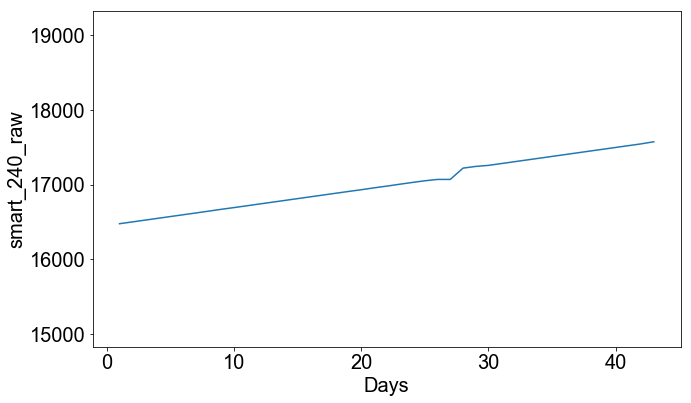

---------------------
2G = 7.331324e+06
sigma**2*lambda = 1.993853e+05
-->H0 rejected
Changepoint detected at position: 27
m1 = 16787.518519
m2 = 17391.562500


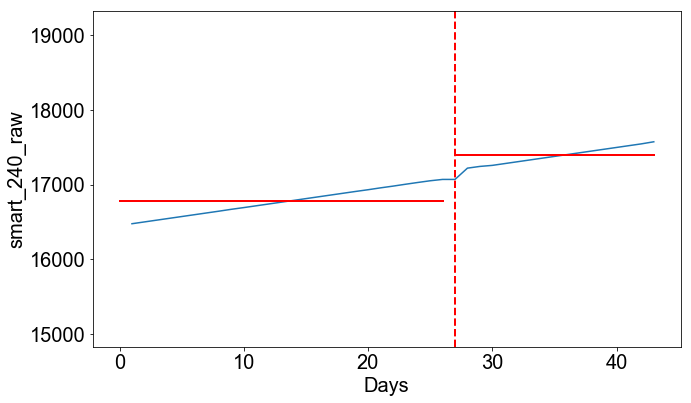

---------------------


In [18]:
ts=np.array(temp['smart_240_raw'])
d = cpt(time_series=ts,feature='smart_240_raw',type="normal-mean")
d.plot_data()
d.find_changepoint()